# Import Required Libraries
Import the necessary libraries, including PyTorch.

In [3]:
# Importing the necessary libraries
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Time Series of Observations')

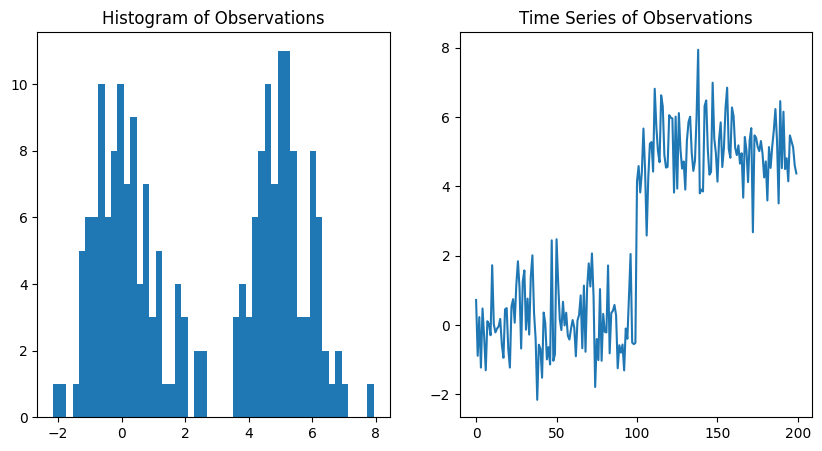

In [4]:
# Generate some observations with two normal distributions randomly mixed
data = np.concatenate([np.random.normal(0, 1, 100), np.random.normal(5, 1, 100)])
#np.random.shuffle(data)

# Plot histogram and time series
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(data, bins=50)
ax[0].set_title('Histogram of Observations')
ax[1].plot(data)
ax[1].set_title('Time Series of Observations')

# Define the Gaussian HMM
Define the Gaussian HMM, including the state transition probabilities, initial state probabilities, and emission probabilities.

In [5]:
# Define the Gaussian HMM
class GaussianHMM(nn.Module):
    def __init__(self, num_states):
        super(GaussianHMM, self).__init__()
        self.num_states = num_states

        # Initialize state transition probabilities
        self.transition_probs = nn.Parameter(torch.randn(num_states, num_states))
        self.transition_probs.data = self.transition_probs.data.softmax(dim=1)

        # Initialize initial state probabilities
        self.initial_probs = nn.Parameter(torch.randn(num_states))
        self.initial_probs.data = self.initial_probs.data.softmax(dim=0)

        # Initialize emission probabilities
        self.emission_means = nn.Parameter(torch.randn(num_states))
        self.emission_stds = nn.Parameter(torch.randn(num_states).exp())

    def forward(self, inputs):
        # Compute the log probabilities of the inputs given the emission distribution
        log_emission_probs = -0.5 * (inputs.unsqueeze(1) - self.emission_means)**2 / self.emission_stds**2
        log_emission_probs -= self.emission_stds.log() + 0.5 * np.log(2 * np.pi)

        # Compute the log probabilities of the initial state
        log_initial_probs = self.initial_probs.log()

        # Compute the log probabilities of the transitions
        log_transition_probs = self.transition_probs.log()

        # Use the forward algorithm to compute the log probability of the inputs
        log_prob = self._forward_algorithm(log_emission_probs, log_initial_probs, log_transition_probs)

        return -log_prob

    def _forward_algorithm(self, log_emission_probs, log_initial_probs, log_transition_probs):
        # Initialize the forward probabilities
        alpha = log_initial_probs + log_emission_probs[:, 0]

        # Iteratively compute the forward probabilities
        for t in range(1, log_emission_probs.size(1)):
            alpha = (alpha.unsqueeze(-1) + log_transition_probs).logsumexp(dim=0) + log_emission_probs[:, t]

        # Return the log probability of the inputs
        return alpha.logsumexp(dim=0)

# Calculate the Negative Log-Likelihood
Calculate the negative log-likelihood of the observed sequence given the model parameters. This will be used as the loss function for training the model.

In [6]:
# Define the loss function
def negative_log_likelihood(self, inputs):
    # Compute the negative log-likelihood 
    log_prob = self.forward(inputs)
    return -log_prob.sum()

# Add the negative_log_likelihood method to the GaussianHMM class
GaussianHMM.negative_log_likelihood = negative_log_likelihood

# Instantiate the model
model = GaussianHMM(num_states=2)

# Define the optimizer
optimizer = torch.optim.Adam(model.parameters())

# Define the training loop
def train(model, data, optimizer, num_epochs):
    for epoch in range(num_epochs):
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass
        loss = model.negative_log_likelihood(data)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Print the loss for this epoch
        if (epoch + 1) % 10 == 0:
            print(f'Epoch {epoch+1}/{num_epochs} - Loss: {loss.item()}')

# Train the model
X = torch.tensor(data)[:, None]
train(model, X, optimizer, num_epochs=100)

# Print the model parameters
print(f"Start Probabilities: {model.initial_probs}")
print(f"Transition Probabilities: {model.transition_probs}")
print(f"Emission Mean: {model.emission_means}")
print(f"Emission Stddev: {model.emission_stds}")

# Print the log probability of the observations
print(f"Log Probability of Observations: {model(X)}")

Epoch 10/100 - Loss: 2.7659328737112183
Epoch 20/100 - Loss: 2.264883162099467
Epoch 30/100 - Loss: 1.1213784390795611
Epoch 40/100 - Loss: nan
Epoch 50/100 - Loss: nan
Epoch 60/100 - Loss: nan
Epoch 70/100 - Loss: nan
Epoch 80/100 - Loss: nan
Epoch 90/100 - Loss: nan
Epoch 100/100 - Loss: nan
Start Probabilities: Parameter containing:
tensor([0.8610,    nan], requires_grad=True)
Transition Probabilities: Parameter containing:
tensor([[0.4416, 0.5584],
        [0.7191, 0.2809]], requires_grad=True)
Emission Mean: Parameter containing:
tensor([0.7602,    nan], requires_grad=True)
Emission Stddev: Parameter containing:
tensor([0.1700,    nan], requires_grad=True)
Log Probability of Observations: tensor([-2.9645,     nan], dtype=torch.float64, grad_fn=<NegBackward0>)
